<a href="https://colab.research.google.com/github/srycps/intro-github/blob/main/EdgeImpulse_Training_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Persiapan Google Colab**

# **1.5 Install Dependensi**

In [4]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.1/949.1 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

1.1 Unggah File Dataset

In [5]:
from google.colab import drive
import shutil
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path ke file ZIP di Google Drive (gantilah dengan path file-mu)
zip_path = "/content/drive/My Drive/EdgeImpulse-Training/dataset-od.zip"

# Buat folder sementara di Google Colab
extract_path = "/content/dataset"

Mounted at /content/drive


1.2 Ekstraksi Dataset

In [6]:
import zipfile
import os

# Tentukan lokasi file zip dan folder ekstraksi
zip_file = '/content/drive/MyDrive/EdgeImpulse-Training/dataset-od.zip'
extract_folder = '/content/dataset/'

# Ekstraksi file zip
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Verifikasi isi folder setelah ekstraksi
extracted_files = os.listdir(extract_folder)
print(extracted_files)

['README.txt', 'training', 'info.labels', 'testing']


1.3 Periksa isi `info.labels`

In [7]:
import json

# Load the info.labels file
with open('/content/dataset/info.labels', 'r') as f:
    labels_data = json.load(f)

# Tampilkan beberapa data pertama untuk memeriksa
for file_data in labels_data['files'][:5]:  # Menampilkan 5 data pertama
    print(f"Image Name: {file_data['name']}")
    print(f"Category: {file_data['category']}")
    print(f"Bounding Boxes: {file_data['boundingBoxes']}")
    print('---')

Image Name: aug_0_1132
Category: testing
Bounding Boxes: [{'label': 'healthy leaf', 'x': 8, 'y': 6, 'width': 210, 'height': 213}]
---
Image Name: aug_0_1149
Category: testing
Bounding Boxes: [{'label': 'healthy leaf', 'x': 4, 'y': 116, 'width': 215, 'height': 74}]
---
Image Name: aug_0_1026
Category: testing
Bounding Boxes: [{'label': 'healthy leaf', 'x': 6, 'y': 0, 'width': 178, 'height': 166}]
---
Image Name: aug_0_1222
Category: testing
Bounding Boxes: [{'label': 'healthy leaf', 'x': 14, 'y': 0, 'width': 203, 'height': 202}]
---
Image Name: aug_0_1184
Category: testing
Bounding Boxes: [{'label': 'healthy leaf', 'x': 7, 'y': 132, 'width': 214, 'height': 87}]
---


1.4 Perbarui `info.labels`

In [8]:
import os
import shutil
import json

# Folder sumber
image_folders = ["/content/dataset/training", "/content/dataset/testing"]

# Folder tujuan
train_target_folder = "/content/dataset/images/train"
val_target_folder = "/content/dataset/images/val"

# Muat file info.labels
info_labels_path = "/content/dataset/info.labels"
with open(info_labels_path, 'r') as f:
    labels_data = json.load(f)

# Pastikan folder tujuan ada
os.makedirs(train_target_folder, exist_ok=True)
os.makedirs(val_target_folder, exist_ok=True)

# Fungsi untuk mencari file berdasarkan bagian nama
def find_file(folder, partial_name):
    for file in os.listdir(folder):
        if partial_name in file:  # Cek apakah nama sebagian cocok
            return os.path.join(folder, file)
    return None  # Tidak ditemukan

# Pindahkan gambar & update info.labels
for file_data in labels_data['files']:
    partial_name = file_data['name']  # Nama tanpa ekstensi
    found = False

    # Tentukan folder tujuan
    if file_data['category'] == 'training':
        new_folder = train_target_folder
        file_data['category'] = 'training'  # Pastikan tetap 'training'
    else:
        new_folder = val_target_folder
        file_data['category'] = 'validation'  # Ubah dari 'testing' ke 'validation'

    new_img_path = os.path.join(new_folder, partial_name + ".jpg")

    # Cari file yang cocok di folder sumber
    for folder in image_folders:
        old_img_path = find_file(folder, partial_name)
        if old_img_path:  # Jika ditemukan
            print(f"Memindahkan: {old_img_path} → {new_img_path}")
            shutil.move(old_img_path, new_img_path)
            found = True
            break  # Berhenti setelah menemukan file

    if not found:
        print(f"⚠️ File tidak ditemukan: {partial_name}")

    # Update path dalam info.labels
    file_data['path'] = new_img_path.replace("/content/dataset/", "")

# Simpan kembali info.labels yang sudah diperbarui
with open(info_labels_path, 'w') as f:
    json.dump(labels_data, f, indent=4)

print("✅ Proses pemindahan selesai dan info.labels diperbarui!")


Memindahkan: /content/dataset/testing/aug_0_1132.jpg.5lvpl6ev.ingestion-78f9656b6b-zb2qb.jpg → /content/dataset/images/val/aug_0_1132.jpg
Memindahkan: /content/dataset/testing/aug_0_1149.jpg.5lvpl6pq.ingestion-78f9656b6b-whhw9.jpg → /content/dataset/images/val/aug_0_1149.jpg
Memindahkan: /content/dataset/testing/aug_0_1026.jpg.5lvpl74g.ingestion-78f9656b6b-zb2qb.jpg → /content/dataset/images/val/aug_0_1026.jpg
Memindahkan: /content/dataset/testing/aug_0_1222.jpg.5lvpl7eb.ingestion-78f9656b6b-svf8s.jpg → /content/dataset/images/val/aug_0_1222.jpg
Memindahkan: /content/dataset/testing/aug_0_1184.jpg.5lvpl7o5.ingestion-78f9656b6b-zb2qb.jpg → /content/dataset/images/val/aug_0_1184.jpg
Memindahkan: /content/dataset/testing/aug_0_1237.jpg.5lvpl82n.ingestion-78f9656b6b-whhw9.jpg → /content/dataset/images/val/aug_0_1237.jpg
Memindahkan: /content/dataset/testing/aug_0_1016.jpg.5lvpl8di.ingestion-78f9656b6b-svf8s.jpg → /content/dataset/images/val/aug_0_1016.jpg
Memindahkan: /content/dataset/test

In [9]:
train_target_folder = "/content/dataset/images/train"
val_target_folder = "/content/dataset/images/val"

print("Jumlah gambar di train:", len(os.listdir(train_target_folder)))
print("Jumlah gambar di val:", len(os.listdir(val_target_folder)))

Jumlah gambar di train: 2113
Jumlah gambar di val: 554


# **2. Persiapan File Konfigurasi untuk YOLO**

3.1 Membaca `info.labels`

In [10]:
# Check the unique labels in the dataset
unique_labels = set()
for file_data in labels_data['files']:
    for bbox in file_data['boundingBoxes']:
        unique_labels.add(bbox['label'])

print("Unique labels found in dataset:", unique_labels)

Unique labels found in dataset: {'tungro', 'brown spot', 'healthy leaf', 'sheath blight'}


3.2 Mengkonversi JSON ke YOLO, dan memindahkan ke folder label sesuai kategori

In [11]:
import os
import json

# Path dataset
dataset_path = "/content/dataset"

# Buka info.labels
info_labels_path = os.path.join(dataset_path, "info.labels")
with open(info_labels_path, "r") as f:
    labels_data = json.load(f)

# Perbaiki nama file secara lebih aman
for file_data in labels_data["files"]:
    original_path = file_data["path"]
    filename, ext = os.path.splitext(os.path.basename(original_path))  # Pisahkan nama & ekstensi

    # Pastikan tetap menggunakan ekstensi asli (bisa .jpg atau .JPG)
    fixed_path = f"{filename}.jpg"
    file_data["path"] = fixed_path  # Perbarui nama path dalam JSON

# Simpan kembali info.labels yang sudah diperbaiki
with open(info_labels_path, "w") as f:
    json.dump(labels_data, f, indent=4)

print("✅ Nama file dalam info.labels sudah diperbaiki!")

✅ Nama file dalam info.labels sudah diperbaiki!


In [ ]:
import sys
import time

art = """
▒▒▒▒▒▄██████████▄▒▒▒▒▒
▒▒▒▄██████████████▄▒▒▒
▒▒██████████████████▒▒
▒▐███▀▀▀▀▀██▀▀▀▀▀███▌▒
▒███▒▒▌■▐▒▒▒▒▌■▐▒▒███▒
▒▐██▄▒▀▀▀▒▒▒▒▀▀▀▒▄██▌▒
▒▒▀████▒▄▄▒▒▄▄▒████▀▒▒
▒▒▐███▒▒▒▀▒▒▀▒▒▒███▌▒▒
▒▒███▒▒▒▒▒▒▒▒▒▒▒▒███▒▒
▒▒▒██▒▒▀▀▀▀▀▀▀▀▒▒██▒▒▒
▒▒▒▐██▄▒▒▒▒▒▒▒▒▄██▌▒▒▒
▒▒▒▒▀████████████▀▒▒▒▒
"""

def type_text(text, delay=0.01):
    for char in text:
        sys.stdout.write(char)
        sys.stdout.flush()
        time.sleep(delay)
    print()

type_text(art)



▒▒▒▒▒▄██████████▄▒▒▒▒▒
▒▒▒▄██████████████▄▒▒▒
▒▒██████████████████▒▒
▒▐███▀▀▀▀▀██▀▀▀▀▀███▌▒
▒███▒▒▌■▐▒▒▒▒▌■▐▒▒███▒
▒▐██▄▒▀▀▀▒▒▒▒▀▀▀▒▄██▌▒
▒▒▀████▒▄▄▒▒▄▄▒████▀▒▒
▒▒▐███▒▒▒▀▒▒▀▒▒▒███▌▒▒
▒▒███▒▒▒▒▒▒▒▒▒▒▒▒███▒▒
▒▒▒██▒▒▀▀▀▀▀▀▀▀▒▒██▒▒▒
▒▒▒▐██▄▒▒▒▒▒▒▒▒▄██▌▒▒▒
▒▒▒▒▀████████████▀▒▒▒▒



In [12]:
import os
import json
import cv2

# Path dataset
dataset_path = "/content/dataset"
image_train_path = os.path.join(dataset_path, "images/train")
image_val_path = os.path.join(dataset_path, "images/val")
label_train_path = os.path.join(dataset_path, "labels/train")
label_val_path = os.path.join(dataset_path, "labels/val")

# Pastikan folder labels/train dan labels/val ada
os.makedirs(label_train_path, exist_ok=True)
os.makedirs(label_val_path, exist_ok=True)

# Buka info.labels
info_labels_path = os.path.join(dataset_path, "info.labels")
with open(info_labels_path, "r") as f:
    labels_data = json.load(f)

# Definisi kelas YOLO (pastikan sesuai urutan model YOLO-mu)
class_names = ["healthy leaf", "brown spot", "sheath blight", "tungro"]

# Perbaiki path gambar dan bounding box
for file_data in labels_data["files"]:
    original_path = file_data["path"]

    # Perbaiki nama file (hapus bagian tambahan di belakang)
    filename = os.path.basename(original_path)
    filename = filename.split(".")[0] + ".jpg"  # Ambil bagian utama dan tambahkan .jpg

    # Tentukan kategori (training atau validation)
    category = file_data["category"]
    label_folder = label_train_path if category == "training" else label_val_path
    label_file_path = os.path.join(label_folder, f"{filename.replace('.jpg', '.txt')}")

    # Cek apakah gambar asli ada
    image_path = os.path.join(image_train_path if category == "training" else image_val_path, filename)
    if not os.path.exists(image_path):
        print(f"⚠️ Gambar tidak ditemukan: {image_path}")
        continue

    # Ambil ukuran gambar untuk normalisasi
    img = cv2.imread(image_path)
    img_height, img_width = img.shape[:2]

    bounding_boxes = file_data.get("boundingBoxes", [])
    with open(label_file_path, "w") as label_file:
        for bbox in bounding_boxes:
            label = bbox["label"]
            if label not in class_names:
                continue  # Jika label tidak dikenal, lewati

            class_id = class_names.index(label)  # Konversi label ke ID

            # Konversi bounding box ke format YOLO (normalisasi ke skala 0-1)
            x_center = (bbox["x"] + bbox["width"] / 2) / img_width
            y_center = (bbox["y"] + bbox["height"] / 2) / img_height
            width = bbox["width"] / img_width
            height = bbox["height"] / img_height

            # Tulis ke file label YOLO
            label_file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

print("✅ Semua label berhasil dikonversi ke format YOLO dengan ukuran yang benar!")


⚠️ Gambar tidak ditemukan: /content/dataset/images/val/aug_0_8267.jpg
⚠️ Gambar tidak ditemukan: /content/dataset/images/val/IMG_20231018_143300_1.jpg
⚠️ Gambar tidak ditemukan: /content/dataset/images/train/aug_0_1162.jpg
⚠️ Gambar tidak ditemukan: /content/dataset/images/train/aug_0_1238.jpg
⚠️ Gambar tidak ditemukan: /content/dataset/images/train/aug_0_1431.jpg
⚠️ Gambar tidak ditemukan: /content/dataset/images/train/aug_0_228.jpg
⚠️ Gambar tidak ditemukan: /content/dataset/images/train/aug_0_7365.jpg
⚠️ Gambar tidak ditemukan: /content/dataset/images/train/aug_0_746.jpg
⚠️ Gambar tidak ditemukan: /content/dataset/images/train/aug_0_7944.jpg
⚠️ Gambar tidak ditemukan: /content/dataset/images/train/aug_0_8192.jpg
⚠️ Gambar tidak ditemukan: /content/dataset/images/train/bs_wb_29.jpg
⚠️ Gambar tidak ditemukan: /content/dataset/images/train/bs_wb_34.jpg
⚠️ Gambar tidak ditemukan: /content/dataset/images/train/bs_wb_44.jpg
⚠️ Gambar tidak ditemukan: /content/dataset/images/train/bs_wb_58

3.3 Verifikasi Struktur Data

*   Periksa apakah semua gambar dan label berada di folder yang bener
*   Periksa apakah tiap gambar punya file label yg sesuai
*   Menampilkan laporan kalau ada yang hilang atau gk cocok
*   Periksa gambar tanpa label dan label tanpa gambar
*   Hapus gambar tanpa label jika perlu
*   Hapus label tanpa gambar jika perlu
*   Membuat label kosong untuk gambar yang tidak memiliki label (opsional)



In [13]:
import os

# Path dataset
image_train_path = "/content/dataset/images/train"
label_train_path = "/content/dataset/labels/train"
image_val_path = "/content/dataset/images/val"
label_val_path = "/content/dataset/labels/val"

def clean_dataset(image_folder, label_folder):
    image_files = {os.path.splitext(f)[0] for f in os.listdir(image_folder) if f.endswith((".jpg", ".png"))}
    label_files = {os.path.splitext(f)[0] for f in os.listdir(label_folder) if f.endswith(".txt")}

    missing_labels = image_files - label_files
    missing_images = label_files - image_files

    if missing_labels:
        print(f"🚨 {len(missing_labels)} gambar tidak memiliki label, membuat label kosong...")
        for img in missing_labels:
            label_path = os.path.join(label_folder, img + ".txt")
            with open(label_path, "w") as f:
                pass  # Buat file label kosong agar tidak error saat training

    if missing_images:
        print(f"🚨 {len(missing_images)} label tidak memiliki gambar, menghapus label...")
        for lbl in missing_images:
            lbl_path = os.path.join(label_folder, lbl + ".txt")
            if os.path.exists(lbl_path):
                os.remove(lbl_path)  # Hapus label tanpa gambar

# Bersihkan folder training dan validation
print("🔍 Membersihkan dataset training...")
clean_dataset(image_train_path, label_train_path)

print("🔍 Membersihkan dataset validation...")
clean_dataset(image_val_path, label_val_path)

print("✅ Dataset siap digunakan!")


🔍 Membersihkan dataset training...
🔍 Membersihkan dataset validation...
✅ Dataset siap digunakan!


3.4 Periksa Struktur Dataset

In [14]:
import os

dataset_path = "/content/dataset"

# Cek jumlah file dalam setiap folder
def count_files(folder):
    return len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])

print("📂 Jumlah gambar dan label dalam dataset:")
print(f"🖼  Training images: {count_files(os.path.join(dataset_path, 'images/train'))}")
print(f"📄 Training labels: {count_files(os.path.join(dataset_path, 'labels/train'))}")
print(f"🖼  Validation images: {count_files(os.path.join(dataset_path, 'images/val'))}")
print(f"📄 Validation labels: {count_files(os.path.join(dataset_path, 'labels/val'))}")

📂 Jumlah gambar dan label dalam dataset:
🖼  Training images: 2113
📄 Training labels: 2113
🖼  Validation images: 554
📄 Validation labels: 554


3.5 Membuat dan menyimpan File dataset.yaml

In [15]:
dataset_yaml = """path: /content/dataset
train: images/train
val: images/val
names:
  0: healthy leaf
  1: brown spot
  2: sheath blight
  3: tungro
"""

with open("/content/dataset/dataset.yaml", "w") as f:
    f.write(dataset_yaml)

print("✅ File dataset.yaml telah dibuat!")


✅ File dataset.yaml telah dibuat!


# **4. Periksa Dataset**

In [16]:
# Load model YOLOv8 untuk memeriksa dataset
model = YOLO("yolov8n.yaml")

# Cek dataset
model.train(data="/content/dataset/dataset.yaml", epochs=1, imgsz=224)

Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/dataset/dataset.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 25.2MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/labels/train... 2113 images, 0 backgrounds, 4 corrupt: 100%|██████████| 2113/2113 [00:02<00:00, 941.67it/s] 

train: WARNING ⚠️ /content/dataset/images/train/20231006_163255.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/20231006_163740.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/20231006_163746.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/20231006_165550.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/20231006_165551.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/20231006_165800.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/20231006_165801.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/Brown_spot (111).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/Brown_spot (113).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/Brown_spot (115).jpg: corrupt JPEG restor

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/labels/val... 554 images, 0 backgrounds, 6 corrupt: 100%|██████████| 554/554 [00:00<00:00, 910.53it/s]

val: WARNING ⚠️ /content/dataset/images/val/20231006_165551(0).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/20231006_165615.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/20231006_165616.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/20231006_165801(0).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (25).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (33).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (36).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (37).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (40).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (43).jpg: corrupt JPEG r

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      3.753      3.969      4.101         38        224: 100%|██████████| 132/132 [02:32<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:20<00:00,  1.13s/it]


                   all        548        618      0.754      0.171     0.0153     0.0033

1 epochs completed in 0.050 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
YOLOv8n summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:19<00:00,  1.06s/it]


                   all        548        618    0.00479      0.294     0.0153    0.00331
          healthy leaf        117        136    0.00179      0.772     0.0444    0.00898
            brown spot        154        163    0.00252      0.337    0.00668   0.000885
         sheath blight        127        139    0.00631     0.0288    0.00181   0.000521
                tungro        150        180    0.00854     0.0389    0.00823    0.00287
Speed: 0.5ms preprocess, 22.8ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cff10760350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

# **5. Training YOLO**

5.0 GPU

In [18]:
model.train(
    data="/content/dataset/dataset.yaml",
    epochs=50,          # Sesuaikan jumlah epoch
    imgsz=640,          # Ukuran gambar (sesuaikan dengan dataset)
    batch=8,           # Sesuaikan batch size dengan RAM
    workers=2,          # Untuk Colab, biasanya cukup 2 worker
    device="cuda"       # Gunakan GPU untuk training lebih cepat
)

Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.5.1+cu124 


ValueError: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: 0
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


5.01 CPU (lebi lama)

In [19]:
model.train(
    data="/content/dataset/dataset.yaml",
    epochs=50,
    imgsz=224,
    batch=16,
    device="cpu"  # Ganti dari ke "cpu"
)

Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/dataset/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=cpu, workers=0, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

train: Scanning /content/dataset/labels/train.cache... 2113 images, 0 backgrounds, 4 corrupt: 100%|██████████| 2113/2113 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/dataset/images/train/20231006_163255.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/20231006_163740.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/20231006_163746.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/20231006_165550.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/20231006_165551.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/20231006_165800.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/20231006_165801.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/Brown_spot (111).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/Brown_spot (113).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/images/train/Brown_spot (115).jpg: corrupt JPEG restor


val: Scanning /content/dataset/labels/val.cache... 554 images, 0 backgrounds, 6 corrupt: 100%|██████████| 554/554 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/dataset/images/val/20231006_165551(0).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/20231006_165615.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/20231006_165616.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/20231006_165801(0).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (25).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (33).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (36).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (37).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (40).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (43).jpg: corrupt JPEG r

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      3.295      3.204      3.601         38        224: 100%|██████████| 132/132 [02:33<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.06it/s]

                   all        548        618     0.0419        0.1     0.0255    0.00732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      2.806      2.931      3.063         32        224: 100%|██████████| 132/132 [02:36<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.09it/s]

                   all        548        618      0.136      0.168     0.0662     0.0207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G       2.55       2.82      2.755         33        224: 100%|██████████| 132/132 [02:30<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.08it/s]

                   all        548        618      0.164      0.324      0.103     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      2.408      2.684      2.599         38        224: 100%|██████████| 132/132 [02:30<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:17<00:00,  1.06it/s]

                   all        548        618     0.0801      0.292     0.0773     0.0192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      2.228        2.6      2.462         39        224: 100%|██████████| 132/132 [02:31<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.06it/s]

                   all        548        618      0.165      0.324      0.179     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      2.156      2.494      2.386         35        224: 100%|██████████| 132/132 [02:27<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:17<00:00,  1.03it/s]

                   all        548        618      0.139      0.243      0.137      0.049



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      2.039       2.37      2.287         36        224: 100%|██████████| 132/132 [02:29<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:17<00:00,  1.04it/s]

                   all        548        618      0.288      0.319      0.247     0.0955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.978      2.284       2.23         36        224: 100%|██████████| 132/132 [02:27<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.09it/s]

                   all        548        618       0.28      0.242      0.195     0.0668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.934      2.219       2.19         42        224: 100%|██████████| 132/132 [02:29<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:21<00:00,  1.19s/it]

                   all        548        618       0.21       0.34      0.204     0.0751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.892      2.177      2.153         33        224: 100%|██████████| 132/132 [02:30<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.07it/s]

                   all        548        618      0.408      0.428      0.371      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.845       2.12      2.114         35        224: 100%|██████████| 132/132 [02:30<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.09it/s]

                   all        548        618      0.387      0.412      0.368      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.851      2.092      2.104         30        224: 100%|██████████| 132/132 [02:28<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:17<00:00,  1.05it/s]

                   all        548        618      0.442      0.468      0.436      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.819      2.005      2.066         29        224: 100%|██████████| 132/132 [02:28<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.11it/s]

                   all        548        618      0.519      0.445      0.455      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.795      2.017      2.058         33        224: 100%|██████████| 132/132 [02:28<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:17<00:00,  1.04it/s]

                   all        548        618      0.562      0.495      0.503      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.776      1.997      2.032         39        224: 100%|██████████| 132/132 [02:30<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.10it/s]

                   all        548        618      0.467      0.438      0.415      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.754      1.983      2.032         34        224: 100%|██████████| 132/132 [02:31<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:17<00:00,  1.05it/s]

                   all        548        618      0.595      0.396      0.456      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.733      1.932      1.993         45        224: 100%|██████████| 132/132 [02:30<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.06it/s]

                   all        548        618      0.505      0.503      0.496       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.726      1.928      1.998         27        224: 100%|██████████| 132/132 [02:30<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:17<00:00,  1.06it/s]

                   all        548        618      0.574      0.497      0.495      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G       1.71      1.919       1.98         32        224: 100%|██████████| 132/132 [02:29<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.09it/s]

                   all        548        618      0.519       0.51      0.478      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G       1.69      1.891      1.956         29        224: 100%|██████████| 132/132 [02:30<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.11it/s]

                   all        548        618      0.541       0.51       0.51      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.672      1.865      1.936         28        224: 100%|██████████| 132/132 [02:27<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.10it/s]

                   all        548        618      0.587      0.474      0.486      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.646      1.843      1.921         37        224: 100%|██████████| 132/132 [02:28<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.10it/s]

                   all        548        618      0.555      0.511      0.471      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.645      1.835      1.925         41        224: 100%|██████████| 132/132 [02:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.09it/s]

                   all        548        618      0.613      0.515       0.55      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.673      1.821      1.929         41        224: 100%|██████████| 132/132 [02:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.12it/s]

                   all        548        618      0.625      0.549      0.549      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.625      1.804      1.892         29        224: 100%|██████████| 132/132 [02:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.06it/s]

                   all        548        618      0.656       0.52      0.554      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.634      1.786      1.905         34        224: 100%|██████████| 132/132 [02:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.11it/s]

                   all        548        618      0.658      0.575      0.589      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.624      1.769      1.884         38        224: 100%|██████████| 132/132 [02:27<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:15<00:00,  1.14it/s]

                   all        548        618       0.62      0.585       0.58       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.607      1.753      1.873         37        224: 100%|██████████| 132/132 [02:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.10it/s]

                   all        548        618      0.541      0.578      0.557      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.593      1.756      1.859         36        224: 100%|██████████| 132/132 [02:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:17<00:00,  1.03it/s]

                   all        548        618      0.633      0.575      0.581      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.573      1.708      1.852         40        224: 100%|██████████| 132/132 [02:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.09it/s]

                   all        548        618      0.572      0.554       0.56      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G        1.6       1.73      1.875         44        224: 100%|██████████| 132/132 [02:27<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:15<00:00,  1.13it/s]

                   all        548        618      0.622      0.575      0.572       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G       1.58      1.712      1.854         33        224: 100%|██████████| 132/132 [02:28<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.10it/s]

                   all        548        618      0.657      0.548      0.578      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.573      1.703      1.836         32        224: 100%|██████████| 132/132 [02:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.12it/s]

                   all        548        618       0.66      0.571      0.591      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.565      1.695      1.836         45        224: 100%|██████████| 132/132 [02:27<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.08it/s]

                   all        548        618       0.61       0.58       0.58      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.565      1.679      1.824         35        224: 100%|██████████| 132/132 [02:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.09it/s]

                   all        548        618       0.66      0.584      0.603      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.541      1.653      1.814         37        224: 100%|██████████| 132/132 [02:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.10it/s]

                   all        548        618      0.693      0.602      0.608      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.537      1.653      1.809         40        224: 100%|██████████| 132/132 [02:25<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:15<00:00,  1.13it/s]

                   all        548        618      0.641      0.608      0.609      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G       1.52      1.638      1.802         36        224: 100%|██████████| 132/132 [02:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.10it/s]

                   all        548        618      0.678      0.594      0.623      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.528      1.637      1.795         41        224: 100%|██████████| 132/132 [02:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.12it/s]

                   all        548        618      0.673      0.611      0.627      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.517      1.606      1.791         40        224: 100%|██████████| 132/132 [02:25<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.12it/s]

                   all        548        618      0.679      0.623      0.643      0.343


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.535      1.568      1.885         16        224: 100%|██████████| 132/132 [02:25<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:15<00:00,  1.15it/s]

                   all        548        618      0.689      0.593      0.638       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.518      1.439      1.862         17        224: 100%|██████████| 132/132 [02:25<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.06it/s]

                   all        548        618      0.682      0.627      0.647      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.498      1.418       1.86         15        224: 100%|██████████| 132/132 [02:24<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:17<00:00,  1.05it/s]

                   all        548        618      0.694      0.656      0.665      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.495      1.388      1.834         13        224: 100%|██████████| 132/132 [02:25<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.11it/s]

                   all        548        618      0.702      0.651      0.649      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.479      1.365       1.83         13        224: 100%|██████████| 132/132 [02:25<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.10it/s]

                   all        548        618      0.696      0.634      0.644      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.446      1.349      1.807         13        224: 100%|██████████| 132/132 [02:25<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.06it/s]

                   all        548        618      0.724       0.64       0.66      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.452      1.349        1.8         17        224: 100%|██████████| 132/132 [02:25<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.09it/s]

                   all        548        618      0.704      0.658      0.669      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.463      1.337      1.815         14        224: 100%|██████████| 132/132 [02:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.09it/s]

                   all        548        618      0.688      0.668      0.669      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.432      1.318      1.789         16        224: 100%|██████████| 132/132 [02:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.11it/s]

                   all        548        618      0.698       0.66      0.665      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.434      1.297      1.796         15        224: 100%|██████████| 132/132 [02:27<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.10it/s]

                   all        548        618        0.7      0.668      0.678      0.376



50 epochs completed in 2.289 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
YOLOv8n summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:15<00:00,  1.13it/s]


                   all        548        618        0.7      0.667      0.678      0.376
          healthy leaf        117        136      0.673      0.699      0.607      0.338
            brown spot        154        163      0.601      0.571      0.577       0.29
         sheath blight        127        139      0.743      0.665      0.717      0.402
                tungro        150        180      0.784      0.733      0.811      0.473
Speed: 0.2ms preprocess, 21.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cff299975d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

# **6. Evaluasi Model**

Cek folder `/content/runs/detect/train/` untuk melihat grafik loss, precision, recall, dan mAP di `results.png`

In [20]:
from ultralytics import YOLO

# Load model hasil training
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Sesuaikan path jika berbeda

# Evaluasi model pada data validasi
metrics = model.val()
print(metrics)

Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
YOLOv8n summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/labels/val.cache... 554 images, 0 backgrounds, 6 corrupt: 100%|██████████| 554/554 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/dataset/images/val/20231006_165551(0).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/20231006_165615.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/20231006_165616.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/20231006_165801(0).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (25).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (33).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (36).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (37).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (40).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (43).jpg: corrupt JPEG r


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:22<00:00,  1.53it/s]


                   all        548        618    0.00483      0.294     0.0154    0.00335
          healthy leaf        117        136    0.00179      0.772     0.0444    0.00898
            brown spot        154        163    0.00254      0.337    0.00669   0.000887
         sheath blight        127        139    0.00639     0.0288    0.00187   0.000556
                tungro        150        180     0.0086     0.0389    0.00863    0.00297
Speed: 0.2ms preprocess, 29.4ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cff0c18aed0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    

In [ ]:
import os
print(os.listdir('/content/dataset/images/train'))
print(os.listdir('/content/dataset/labels/train'))


['Brown_spot (222).jpg', 'Healthy_rice_leaf (153).jpg', 'Brown_spot (221).jpg', 'TUNGRO3_105.jpg', 'TUNGRO3_203.jpg', 'TUNGRO3_135.jpg', 'TUNGRO3_227.jpg', 'aug_0_5005.jpg', 'aug_0_9190.jpg', 'aug_0_7265.jpg', 'Healthy_rice_leaf (49).jpg', 'aug_0_9016.jpg', 'TUNGRO2_105.jpg', 'Sheath_Blight (73).jpg', 'aug_0_5994.jpg', 'aug_0_7379.jpg', 'aug_0_9382.jpg', 'IMG_20231014_171113.jpg', 'TUNGRO3_219.jpg', 'TUNGRO1_026.jpg', 'aug_0_1280.jpg', 'TUNGRO2_033.jpg', 'Healthy_rice_leaf (77).jpg', 'rt_wb_114.jpg', 'aug_0_6076.jpg', 'aug_0_4912.jpg', 'aug_0_6621.jpg', 'aug_0_8172.jpg', 'Sheath_Blight (18).jpg', 'Healthy_rice_leaf (34).jpg', 'Sheath_Blight (114).jpg', 'aug_0_7642.jpg', 'aug_0_4958.jpg', 'TUNGRO3_117.jpg', 'IMG_20231018_142849.jpg', 'bs_wb_34.jpg', 'TUNGRO1_007.jpg', 'aug_0_131.jpg', 'bs_wb_75.jpg', 'TUNGRO4_201.jpg', 'aug_0_6132.jpg', 'aug_0_8332.jpg', 'aug_0_1396.jpg', 'IMG_20231018_143315.jpg', 'Sheath_Blight (146).jpg', 'aug_0_4917.jpg', 'TUNGRO4_200.jpg', 'bs_wb_30.jpg', 'TUNGRO4_

# 7. **Pengujian**

In [21]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)


val: Scanning /content/dataset/labels/val.cache... 554 images, 0 backgrounds, 6 corrupt: 100%|██████████| 554/554 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/dataset/images/val/20231006_165551(0).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/20231006_165615.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/20231006_165616.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/20231006_165801(0).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (25).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (33).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (36).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (37).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (40).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/images/val/Healthy_rice_leaf (43).jpg: corrupt JPEG r


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


                   all        548        618    0.00483      0.294     0.0154    0.00335
          healthy leaf        117        136    0.00179      0.772     0.0444    0.00898
            brown spot        154        163    0.00254      0.337    0.00669   0.000887
         sheath blight        127        139    0.00639     0.0288    0.00187   0.000556
                tungro        150        180     0.0086     0.0389    0.00863    0.00297
Speed: 0.1ms preprocess, 21.2ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cff109aaed0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,   


image 1/1 /content/dataset/testing/aug_0_882.jpg.5lvplv8j.ingestion-78f9656b6b-svf8s.jpg: 224x224 2 healthy leafs, 32.4ms
Speed: 0.4ms preprocess, 32.4ms inference, 4.2ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict


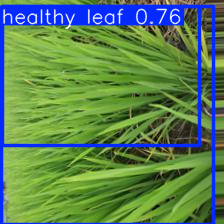

In [24]:
from ultralytics import YOLO

# Load model terbaik
model = YOLO("runs/detect/train2/weights/best.pt")

# Gambar yang ingin diuji (ganti dengan path gambar kamu)
image_path = "dataset/testing/aug_0_882.jpg.5lvplv8j.ingestion-78f9656b6b-svf8s.jpg"

# Jalankan inference
results = model(image_path, save=True, conf=0.3)

# Tampilkan hasil
for result in results:
    result.show()  # Untuk menampilkan gambar dengan bounding box